# This is to generate a random combination of serveral parameters within certain range + Latin Hypercube method

In [47]:
# magic lines that avoid re-start 
%load_ext autoreload
%autoreload 2
import csv, random, os
import pybamm as pb;import pandas as pd;import numpy as np;
import os, json,openpyxl,traceback,multiprocessing,scipy.optimize
import matplotlib.pyplot as plt;
import imageio,timeit,random,time, signal
from scipy.io import savemat,loadmat;
from pybamm import constants,exp;import matplotlib as mpl; 
fs=17; 
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
# def functions
def generate_combinations(Bounds, Num_tot):
    lower_bounds = []
    upper_bounds = []
    for bound in Bounds:
        lower_bounds.append(bound[0])
        upper_bounds.append(bound[1])
    combinations = []
    for _ in range(Num_tot):
        combination = []
        for lower, upper in zip(lower_bounds, upper_bounds):
            value = random.uniform(lower, upper)
            combination.append(value)
        combinations.append(combination)
    return combinations

def save_combinations_to_csv(combinations, parameter_names, filename):
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(parameter_names)  # Write parameter names as the first row
        for combination in combinations:
            writer.writerow(combination)

In [ ]:
BasicPath =  os.path.expanduser("~/EnvPBGEM_Linux/SimSave/P2_R9_Dim")
Target  = f'/Get_Random_sets/'
if not os.path.exists(BasicPath + Target):
   os.mkdir(BasicPath + Target)

In [37]:
# 200 cases for dry-out only - 2023-6-4
# Get candidates instead of random value - only for SEI
# we still want other mechanisms to be open but will make them very small
candidates_Dint = (np.exp(np.linspace(np.log(3e-20), np.log(3e-18), num=10))).tolist()
candidates_elely_res = [0.999, 1.0]    # pick only 0.99 and 1.0
candidates_V_SEI  = (np.linspace(4e-05, 15e-05, num=10)).tolist()
Candidates = [
    candidates_Dint, candidates_elely_res,
    candidates_V_SEI]
parameter_names = [
    'Inner SEI lithium interstitial diffusivity [m2.s-1]', 
    'Initial electrolyte excessive amount ratio', 
    'Outer SEI partial molar volume [m3.mol-1]', 
]
# Usage example:
BasicPath =  os.path.expanduser("~/EnvPBGEM_Linux/SimSave/P2_R9_Dim")
Target  = f'/Get_Random_sets/'
if not os.path.exists(BasicPath + Target):
   os.mkdir(BasicPath + Target)
combinations = []
for Dint in candidates_Dint:
    for elely_res in candidates_elely_res:
        for V_SEI in candidates_V_SEI:
            combinations.append([Dint,elely_res,V_SEI])
filename = BasicPath+Target+'200cases_for_SEI_ONLY.csv'
save_combinations_to_csv(combinations, parameter_names, filename)
print("Combinations saved to '200cases_for_SEI_ONLY.csv' file.")

Combinations saved to '200cases_for_SEI_ONLY.csv' file.


In [45]:
# 10 cases for dry-out only - 2023-6-7
Target_name = "20cases_for_Dry_out"
candidates_Dint = [3.97e-19]
candidates_elely_res = [ 1.0]    # pick only 0.99 and 1.0
candidates_V_SEI  = (np.linspace(4e-05, 15e-05, num=20)).tolist()
Candidates = [
    candidates_Dint, candidates_elely_res,
    candidates_V_SEI]
parameter_names = [
    'Inner SEI lithium interstitial diffusivity [m2.s-1]', 
    'Initial electrolyte excessive amount ratio', 
    'Outer SEI partial molar volume [m3.mol-1]', 
]
# Usage example:
combinations = []
for Dint in candidates_Dint:
    for elely_res in candidates_elely_res:
        for V_SEI in candidates_V_SEI:
            combinations.append([Dint,elely_res,V_SEI])
filename = BasicPath+Target+f'{Target_name}.csv'
save_combinations_to_csv(combinations, parameter_names, filename)
print(f"Combinations saved to '{Target_name}.csv' file.")

Combinations saved to '20cases_for_Dry_out.csv' file.


In [54]:
# Latin hypercube - 6 parameters, 200 cases, - 23-06-08 really big range for 
from pyDOE import lhs
# Keep dry-out ratio=1; discard stress-driven LAM_Pe
num = 200; 
cands_Dint = (
    np.exp(np.linspace(np.log(3e-22), np.log(3e-16), num=num))).tolist()
cands_Decay = (
    np.exp(np.linspace(np.log(4e-10), np.log(4e-4), num=num))).tolist()
cands_kLiP = (
    np.exp(np.linspace(np.log(1e-14), np.log(1e-6), num=num))).tolist()
cands_LAM_Nep = (
    np.exp(np.linspace(np.log(1e-12), np.log(3e-5), num=num))).tolist()
cands_k_Necr = (
    np.exp(np.linspace(np.log(1e-25), np.log(1e-16), num=num))).tolist()
cands_V_SEI = (
    np.linspace(4e-5, 15e-5, num=num)).tolist()
parameter_names = [
    'Inner SEI lithium interstitial diffusivity [m2.s-1]', 
    'Dead lithium decay constant [s-1]',
    'Lithium plating kinetic rate constant [m.s-1]',
    'Negative electrode LAM constant proportional term [s-1]',
    'Negative electrode cracking rate',
    'Outer SEI partial molar volume [m3.mol-1]', ]
# Combine the candidate lists
candidate_lists = [
    cands_Dint, cands_Decay, cands_kLiP, 
    cands_LAM_Nep, cands_k_Necr, cands_V_SEI]

# Generate Latin hypercube samples
samples = lhs(len(candidate_lists), samples=num)

# Initialize the parameter combinations list
combinations = []

# Create the parameter combinations
for sample in samples:
    combination = []
    for i, candidate_list in enumerate(candidate_lists):
        index = int(sample[i] * num)
        combination.append(candidate_list[index])
    combinations.append(combination)

Target_name = "Latin_6para_200cases_wideRange"
filename = BasicPath+Target+f'{Target_name}.csv'
save_combinations_to_csv(combinations, parameter_names, filename)
print(f"Combinations saved to '{Target_name}.csv' file.")

Combinations saved to 'Latin_6para_200cases_wideRange.csv' file.


In [55]:
# 23-06-10 Latin hypercube - 6 parameters, 200 cases, - 
from pyDOE import lhs
# Keep dry-out ratio=1; discard stress-driven LAM_Pe
num = 200; 
cands_Dint = ( # IDEAL: 3.87E-19; 
    np.exp(np.linspace(np.log(3e-20), np.log(3e-18), num=num))).tolist()
cands_Decay = (
    np.exp(np.linspace(np.log(1e-13), np.log(1e-10), num=num))).tolist()
cands_kLiP = (
    np.exp(np.linspace(np.log(1e-15), np.log(1e-13), num=num))).tolist()
cands_LAM_Nep = (
    np.exp(np.linspace(np.log(1e-16), np.log(1e-14), num=num))).tolist()
cands_k_Necr = (
    np.exp(np.linspace(np.log(1e-25), np.log(1e-13), num=num))).tolist()
cands_V_SEI = (
    np.linspace(5.05e-5, 12e-5, num=num)).tolist()
parameter_names = [
    'Inner SEI lithium interstitial diffusivity [m2.s-1]', 
    'Dead lithium decay constant [s-1]',
    'Lithium plating kinetic rate constant [m.s-1]',
    'Negative electrode LAM constant proportional term [s-1]',
    'Negative electrode cracking rate',
    'Outer SEI partial molar volume [m3.mol-1]', ]
# Combine the candidate lists
candidate_lists = [
    cands_Dint, cands_Decay, cands_kLiP, 
    cands_LAM_Nep, cands_k_Necr, cands_V_SEI]

# Generate Latin hypercube samples
samples = lhs(len(candidate_lists), samples=num)

# Initialize the parameter combinations list
combinations = []

# Create the parameter combinations
for sample in samples:
    combination = []
    for i, candidate_list in enumerate(candidate_lists):
        index = int(sample[i] * num)
        combination.append(candidate_list[index])
    combinations.append(combination)

Target_name = "Latin_6para_200cases_narrow"
filename = BasicPath+Target+f'{Target_name}.csv'
save_combinations_to_csv(combinations, parameter_names, filename)
print(f"Combinations saved to '{Target_name}.csv' file.")

Combinations saved to 'Latin_6para_200cases_narrow.csv' file.


In [107]:
# 2023-6-12 - Latin hypercube - 6 parameters, 10 cases, 
#         add expeirment (3) and temperature (3)
from pyDOE import lhs
# Keep dry-out ratio=1; discard stress-driven LAM_Pe
num = 10; 
cands_Dint = ( # IDEAL: 3.87E-19; 
    np.exp(np.linspace(np.log(3e-20), np.log(3e-18), num=num))).tolist()
cands_Decay = (
    np.exp(np.linspace(np.log(1e-13), np.log(1e-10), num=num))).tolist()
cands_kLiP = (
    np.exp(np.linspace(np.log(1e-15), np.log(1e-13), num=num))).tolist()
cands_LAM_Nep = (
    np.exp(np.linspace(np.log(1e-16), np.log(1e-14), num=num))).tolist()
cands_k_Necr = (
    np.exp(np.linspace(np.log(1e-25), np.log(1e-21), num=num))).tolist()
cands_V_SEI = (
    np.linspace(5.05e-5, 12e-5, num=num)).tolist()
parameter_names = [
    "Scan No",
    "Exp No.",
    "Ageing temperature",
    'Inner SEI lithium interstitial diffusivity [m2.s-1]', 
    'Dead lithium decay constant [s-1]',
    'Lithium plating kinetic rate constant [m.s-1]',
    'Negative electrode LAM constant proportional term [s-1]',
    'Negative electrode cracking rate',
    'Outer SEI partial molar volume [m3.mol-1]', ]
# Combine the candidate lists
candidate_lists = [
    cands_Dint, cands_Decay, cands_kLiP, 
    cands_LAM_Nep, cands_k_Necr, cands_V_SEI]

# Generate Latin hypercube samples
samples = lhs(len(candidate_lists), samples=num)
# Initialize the parameter combinations list
combinations = []
Exps  = [2,3,5]
Temps = [10.0,25.0,40.0]

para_dict_Same = {
   "Cycles within RPT":1,
   "RPT temperature":25,
   "Mesh list":[5,5,5,60,20],   # Simon uses 30
   "Para_Set": "OKane2023", # Li2023_Coupled
   "Model option":{
        "contact resistance": "true",
        "open-circuit potential": "current sigmoid",
        "thermal": "lumped",
        "SEI": "interstitial-diffusion limited",
        "SEI on cracks": "true",
        "SEI film resistance": "distributed", 
        "SEI porosity change": "true",
        "particle mechanics": ("swelling and cracking", "swelling only"),
        "loss of active material": ("stress-driven","none"),
        "lithium plating": "partially reversible",},
    "Positive electrode LAM constant proportional term [s-1]": 1e-16,
    "Current solvent concentration in the reservoir [mol.m-3]":4541.0,
    "Current electrolyte concentration in the reservoir [mol.m-3]":1000,
    "Ratio of Li-ion concentration change in electrolyte consider solvent consumption":1.0,
    'EC initial concentration in electrolyte [mol.m-3]':4541.0,
    'Typical EC concentration in electrolyte [mol.m-3]':4541.0, 
    # unchange now:
    'Initial electrolyte excessive amount ratio':1.0, 
    "Ratio of lithium moles to SEI moles":1.0,
    "Contact resistance [Ohm]": 0.012,
}
unchange_key2 = list(para_dict_Same.keys())
unchange_val2 = list(para_dict_Same.values())
# Create the parameter combinations
count = 0
for Exp in Exps:
    for Temp in Temps:
        for sample in samples:
            count += 1      # "Scan No"
            combination = [count,Exp,Temp,]
            for i, candidate_list in enumerate(candidate_lists):
                index = int(sample[i] * num)
                combination.append(candidate_list[index])
            combination = [*combination,*unchange_val2]
            combinations.append(combination)
parameter_names = [*parameter_names,*unchange_key2]
Target_name = "Test_scan_exp_temp"
filename = BasicPath+"/Get_Random_sets/"+f'{Target_name}.csv'
save_combinations_to_csv(combinations, parameter_names, filename)
print(f"Combinations saved to '{Target_name}.csv' file.") 

Combinations saved to 'Test_scan_exp_temp.csv' file.


In [109]:
# 2023-6-15 Scan "SEI growth activation energy [J.mol-1]" based on 
#           case-17 and 142 in Latin_6para_200cases_narrow round
num = 10; 
cands_Eact_SEI = (
    np.linspace(1e4, 1e5, num=num)).tolist()
parameter_names = [
    "Scan No",
    "Exp No.",
    "Ageing temperature",
    "SEI growth activation energy [J.mol-1]", ]
# Combine the candidate lists
candidate_lists = [cands_Eact_SEI,]

# Initialize the parameter combinations list
combinations = []
Exps  = [2,]
Temps = [10.0,25.0,40.0]

para_dict_Same = {
   "Cycles within RPT":1,
   "RPT temperature":25,
   "Mesh list":[5,5,5,60,20],   # Simon uses 30
   "Para_Set": "OKane2023", # Li2023_Coupled
   "Model option":{
        "contact resistance": "true",
        "open-circuit potential": "current sigmoid",
        "thermal": "lumped",
        "SEI": "interstitial-diffusion limited",
        "SEI on cracks": "true",
        "SEI film resistance": "distributed", 
        "SEI porosity change": "true",
        "particle mechanics": ("swelling and cracking", "swelling only"),
        "loss of active material": ("stress-driven","none"),
        "lithium plating": "partially reversible",},
    "Positive electrode LAM constant proportional term [s-1]": 1e-16,
    "Current solvent concentration in the reservoir [mol.m-3]":4541.0,
    "Current electrolyte concentration in the reservoir [mol.m-3]":1000,
    "Ratio of Li-ion concentration change in electrolyte consider solvent consumption":1.0,
    'EC initial concentration in electrolyte [mol.m-3]':4541.0,
    'Typical EC concentration in electrolyte [mol.m-3]':4541.0, 
    # unchange now:
    'Initial electrolyte excessive amount ratio':1.0, 
    "Ratio of lithium moles to SEI moles":1.0,
    "Contact resistance [Ohm]": 0.012,
    'Inner SEI lithium interstitial diffusivity [m2.s-1]':3.83E-19, 
    'Dead lithium decay constant [s-1]':1.19E-13,
    'Lithium plating kinetic rate constant [m.s-1]':4.50E-15,
    'Negative electrode LAM constant proportional term [s-1]':2.77E-16,
    'Negative electrode cracking rate':5.29E-25,
    'Outer SEI partial molar volume [m3.mol-1]':6.41E-05,
}
unchange_key2 = list(para_dict_Same.keys())
unchange_val2 = list(para_dict_Same.values())
# Create the parameter combinations
count = 0
for Exp in Exps:
    for Temp in Temps:
        for Eact_SEI in cands_Eact_SEI:
            count += 1      # "Scan No"
            combination = [count,Exp,Temp,Eact_SEI,]
            combination = [*combination,*unchange_val2]
            combinations.append(combination)
parameter_names = [*parameter_names,*unchange_key2]
Target_name = "Case142_Eact_SEI"
filename = BasicPath+"/Get_Random_sets/"+f'{Target_name}.csv'
save_combinations_to_csv(combinations, parameter_names, filename)
print(f"Combinations saved to '{Target_name}.csv' file.") 

Combinations saved to 'Case142_Eact_SEI.csv' file.


In [110]:
# 2023-6-17 - Latin hypercube enable cracking activation - 
#   9 parameters, 200 cases * 3 temperature = 600, 
from pyDOE import lhs
# Keep dry-out ratio=1; discard stress-driven LAM_Pe
num = 200; 
cands_Dint = ( # IDEAL: 3.87E-19; 
    np.exp(np.linspace(np.log(1e-21), np.log(5e-18), num=num))).tolist()
cands_Decay = (
    np.exp(np.linspace(np.log(1e-10), np.log(1e-6), num=num))).tolist()
cands_kLiP = (
    np.exp(np.linspace(np.log(1e-13), np.log(2e-9), num=num))).tolist()
cands_LAM_Nep = (
    np.exp(np.linspace(np.log(1e-15), np.log(1e-9), num=num))).tolist()
cands_k_Necr = (
    np.exp(np.linspace(np.log(1e-25), np.log(1e-13), num=num))).tolist()
cands_V_SEI = (
    np.linspace(5.05e-5, 14e-5, num=num)).tolist()
cands_Eact_SEI = (
    np.linspace(1e4, 4e4, num=num)).tolist()
cands_Eact_crn = (
    np.linspace(1e4, 4e4, num=num)).tolist()
cands_h = (
    np.linspace(10, 50, num=num)).tolist()
parameter_names = [
    "Scan No",
    "Exp No.",
    "Ageing temperature",
    'Inner SEI lithium interstitial diffusivity [m2.s-1]', 
    'Dead lithium decay constant [s-1]',
    'Lithium plating kinetic rate constant [m.s-1]',
    'Negative electrode LAM constant proportional term [s-1]',
    'Negative electrode cracking rate',
    'Outer SEI partial molar volume [m3.mol-1]', 
    'SEI growth activation energy [J.mol-1]',
    'Negative cracking growth activation energy [J.mol-1]',
    'Total heat transfer coefficient [W.m-2.K-1]',
]
# Combine the candidate lists
candidate_lists = [
    cands_Dint, cands_Decay, cands_kLiP, 
    cands_LAM_Nep, cands_k_Necr, cands_V_SEI,
    cands_Eact_SEI,cands_Eact_crn,cands_h]

# Generate Latin hypercube samples
samples = lhs(len(candidate_lists), samples=num)
# Initialize the parameter combinations list
combinations = []
Exps  = [2,]
Temps = [10.0,25.0,40.0]

para_dict_Same = {
   "Cycles within RPT":1,
   "RPT temperature":25,
   "Mesh list":[5,5,5,60,20],   # Simon uses 30
   "Para_Set": "OKane2023", # Li2023_Coupled
   "Model option":{
        "contact resistance": "true",
        "open-circuit potential": "current sigmoid",
        "thermal": "lumped",
        "SEI": "interstitial-diffusion limited",
        "SEI on cracks": "true",
        "SEI film resistance": "distributed", 
        "SEI porosity change": "true",
        "particle mechanics": ("swelling and cracking", "swelling only"),
        "loss of active material": ("stress-driven","none"),
        "lithium plating": "partially reversible",},
    "Positive electrode LAM constant proportional term [s-1]": 1e-16,
    "Current solvent concentration in the reservoir [mol.m-3]":4541.0,
    "Current electrolyte concentration in the reservoir [mol.m-3]":1000,
    "Ratio of Li-ion concentration change in electrolyte consider solvent consumption":1.0,
    'EC initial concentration in electrolyte [mol.m-3]':4541.0,
    'Typical EC concentration in electrolyte [mol.m-3]':4541.0, 
    # unchange now:
    'Initial electrolyte excessive amount ratio':1.0, 
    "Ratio of lithium moles to SEI moles":1.0,
    "Contact resistance [Ohm]": 0.012,
}
unchange_key2 = list(para_dict_Same.keys())
unchange_val2 = list(para_dict_Same.values())
# Create the parameter combinations
count = 0
for Exp in Exps:
    for Temp in Temps:
        for sample in samples:
            count += 1      # "Scan No"
            combination = [count,Exp,Temp,]
            for i, candidate_list in enumerate(candidate_lists):
                index = int(sample[i] * num)
                combination.append(candidate_list[index])
            combination = [*combination,*unchange_val2]
            combinations.append(combination)
parameter_names = [*parameter_names,*unchange_key2]
Target_name = "Simon_w_cr_h"
filename = BasicPath+"/Get_Random_sets/"+f'{Target_name}.csv'
save_combinations_to_csv(combinations, parameter_names, filename)
print(f"Combinations saved to '{Target_name}.csv' file.") 

Combinations saved to 'Simon_w_cr_h.csv' file.


In [111]:
# 2023-6-17 - Latin hypercube open only SEI and LiP
#   9 parameters, 200 cases * 3 temperature = 600, 
from pyDOE import lhs
# Keep dry-out ratio=1; discard stress-driven LAM_Pe
num = 200; 
cands_Dint = ( # IDEAL: 3.87E-19; 
    np.exp(np.linspace(np.log(1e-21), np.log(5e-18), num=num))).tolist()
cands_Decay = (
    np.exp(np.linspace(np.log(1e-10), np.log(1e-6), num=num))).tolist()
cands_kLiP = (
    np.exp(np.linspace(np.log(1e-13), np.log(2e-9), num=num))).tolist()
cands_V_SEI = (
    np.linspace(8.05e-5, 14e-5, num=num)).tolist()
cands_Eact_SEI = (
    np.linspace(1e4, 4e4, num=num)).tolist()
cands_h = (
    np.linspace(15, 40, num=num)).tolist()
parameter_names = [
    "Scan No",
    "Exp No.",
    "Ageing temperature",
    'Inner SEI lithium interstitial diffusivity [m2.s-1]', 
    'Dead lithium decay constant [s-1]',
    'Lithium plating kinetic rate constant [m.s-1]',
    'Outer SEI partial molar volume [m3.mol-1]', 
    'SEI growth activation energy [J.mol-1]',
    'Total heat transfer coefficient [W.m-2.K-1]',
]
# Combine the candidate lists
candidate_lists = [
    cands_Dint, cands_Decay, cands_kLiP, 
    cands_V_SEI, cands_Eact_SEI,cands_h]

# Generate Latin hypercube samples
samples = lhs(len(candidate_lists), samples=num)
# Initialize the parameter combinations list
combinations = []
Exps  = [2,]
Temps = [10.0,25.0,40.0]

para_dict_Same = {
   "Cycles within RPT":1,
   "RPT temperature":25,
   "Mesh list":[5,5,5,60,20],   # Simon uses 30
   "Para_Set": "OKane2023", # Li2023_Coupled
   "Model option":{
        "contact resistance": "true",
        "open-circuit potential": "current sigmoid",
        "thermal": "lumped",
        "SEI": "interstitial-diffusion limited",
        "SEI film resistance": "distributed", 
        "SEI porosity change": "true",
        "lithium plating": "partially reversible",},
    "Positive electrode LAM constant proportional term [s-1]": 1e-16,
    "Current solvent concentration in the reservoir [mol.m-3]":4541.0,
    "Current electrolyte concentration in the reservoir [mol.m-3]":1000,
    "Ratio of Li-ion concentration change in electrolyte consider solvent consumption":1.0,
    'EC initial concentration in electrolyte [mol.m-3]':4541.0,
    'Typical EC concentration in electrolyte [mol.m-3]':4541.0, 
    # unchange now:
    'Initial electrolyte excessive amount ratio':1.0, 
    "Ratio of lithium moles to SEI moles":1.0,
    "Contact resistance [Ohm]": 0.012,
}
unchange_key2 = list(para_dict_Same.keys())
unchange_val2 = list(para_dict_Same.values())
# Create the parameter combinations
count = 0
for Exp in Exps:
    for Temp in Temps:
        for sample in samples:
            count += 1      # "Scan No"
            combination = [count,Exp,Temp,]
            for i, candidate_list in enumerate(candidate_lists):
                index = int(sample[i] * num)
                combination.append(candidate_list[index])
            combination = [*combination,*unchange_val2]
            combinations.append(combination)
parameter_names = [*parameter_names,*unchange_key2]
Target_name = "Simon_SEILiP_h"
filename = BasicPath+"/Get_Random_sets/"+f'{Target_name}.csv'
save_combinations_to_csv(combinations, parameter_names, filename)
print(f"Combinations saved to '{Target_name}.csv' file.") 

Combinations saved to 'Simon_SEILiP_h.csv' file.


In [86]:
def load_combinations_from_csv(Para_file):
    dataframe = pd.read_csv(Para_file)
    parameter_names = dataframe.columns.tolist()
    combinations = dataframe.values.tolist()
    return parameter_names, combinations
Para_file = BasicPath+'/Get_Random_sets/'+f'{Target_name}.csv'
parameter_names, combinations = load_combinations_from_csv(Para_file)
print(parameter_names)
print(combinations[0])
print(len(combinations))

['Exp No.', 'Ageing temperature', 'Inner SEI lithium interstitial diffusivity [m2.s-1]', 'Dead lithium decay constant [s-1]', 'Lithium plating kinetic rate constant [m.s-1]', 'Negative electrode LAM constant proportional term [s-1]', 'Negative electrode cracking rate', 'Outer SEI partial molar volume [m3.mol-1]']
[2.0, 10.0, 8.347678206621338e-20, 1e-13, 1.6681005372000598e-15, 1.668100537200052e-16, 4.641588833612756e-19, 8.13888888888889e-05]
90


[[2, 4], [5, 3], [3, 5], [4, 2]]


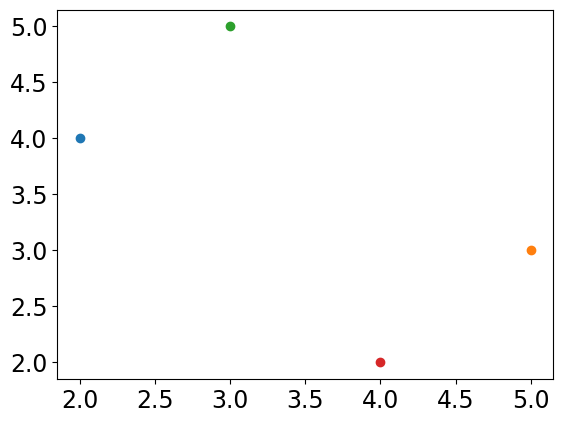

In [81]:
# test latin: if the sample list is less than num, than will fail!
num = 4
X = [2,3,4,5]; Y= [2,3,4,5]; candidate_lists = [X,Y]
samples_t = lhs(2, samples=num)
combinations = []
for sample in samples_t:
    combination = []
    for i, candidate_list in enumerate(candidate_lists):
        index = int(sample[i] * num)
        combination.append(candidate_list[index])
    combinations.append(combination)
print(combinations)
for combination in combinations:
    plt.scatter(combination[0],combination[1])

In [5]:
# early - 2023--6-01
# Scan for all cases - ONLY run once!  - 
# first, we need to define the bounds for all 8 parameters
bounds_Dint = [3e-20,4e-19]
bounds_Li_decay = [4e-7,2.5e-6 ]
bounds_k_LiP = [1e-10, 1e-8]
bounds_LAM_Nep = [1e-9, 3e-7]
bounds_k_Necr = [1e-21, 9e-20]
bounds_elely_res = [0.999, 1.4]
bounds_V_EC  =  [4.8e-5, 6.67e-5]
bounds_R_cont     = [0.0105, 0.02 ]
Bounds = [
    bounds_Dint,   bounds_Li_decay, bounds_k_LiP,
    bounds_LAM_Nep,bounds_k_Necr,   bounds_elely_res,
    bounds_V_EC,bounds_R_cont]
parameter_names = [
    'Inner SEI lithium interstitial diffusivity [m2.s-1]', 
    'Dead lithium decay constant [s-1]', 
    'Lithium plating kinetic rate constant [m.s-1]', 
    'Negative electrode LAM constant proportional term [s-1]', 
    'Negative electrode cracking rate', 
    'Initial electrolyte excessive amount ratio', 
    'EC partial molar volume [m3.mol-1]', 
    'Contact resistance [Ohm]'
]


# Usage example:
BasicPath =  os.path.expanduser("~/EnvPBGEM_Linux/SimSave/P2_R9_Dim")
Target  = f'/Get_Random_sets/'
if not os.path.exists(BasicPath + Target):
   os.mkdir(BasicPath + Target)
Random_1000 = generate_combinations(Bounds, Num_tot=1000)
filename = BasicPath+Target+'Random_1000sets.csv'
save_combinations_to_csv(Random_1000, parameter_names, filename)
print("Combinations saved to 'Random_1000sets.csv' file.")


Combinations saved to 'Random_1000sets.csv' file.


In [38]:
# reload
def load_combinations_from_csv(filename):
    dataframe = pd.read_csv(filename)
    parameter_names = dataframe.columns.tolist()
    combinations = dataframe.values.tolist()
    return parameter_names, combinations

# Usage example:
filename = BasicPath+Target+'200cases_for_SEI_ONLY.csv'
parameter_names, combinations = load_combinations_from_csv(filename)


In [40]:
#Scan_start = 1;    Scan_end = 10; 
Indexs =np.arange(Scan_start-1,Scan_end)
Para_dict_list = []

def load_combinations_from_csv(filename):
    dataframe = pd.read_csv(filename)
    parameter_names = dataframe.columns.tolist()
    combinations = dataframe.values.tolist()
    return parameter_names, combinations

# Usage example:
filename = BasicPath+Target+'200cases_for_SEI_ONLY.csv'
parameter_names, combinations = load_combinations_from_csv(filename)

for index in Indexs:
    para_active = {}
    for parameter_name,para_value in zip(parameter_names,combinations[index] ):
        para_active[parameter_name] = para_value
    para_sum = {**para_active,**para_dict_Same}
    Para_dict_list.append(para_sum)

In [41]:
Para_dict_list[0]

{'Inner SEI lithium interstitial diffusivity [m2.s-1]': 3e-20,
 'Initial electrolyte excessive amount ratio': 0.999,
 'Outer SEI partial molar volume [m3.mol-1]': 9.5e-05,
 'Ageing temperature': 25,
 'Total ageing cycles': 6,
 'Ageing cycles between RPT': 1,
 'Update cycles for ageing': 1,
 'Cycles within RPT': 1,
 'RPT temperature': 25,
 'Mesh list': [5, 5, 5, 60, 20],
 'Para_Set': 'OKane2023',
 'Model option': {'open-circuit potential': 'current sigmoid',
  'thermal': 'lumped',
  'SEI': 'interstitial-diffusion limited',
  'SEI on cracks': 'true',
  'SEI film resistance': 'distributed',
  'SEI porosity change': 'true',
  'particle mechanics': ('swelling and cracking', 'swelling only'),
  'loss of active material': ('stress-driven', 'none'),
  'lithium plating': 'partially reversible'},
 'Positive electrode LAM constant proportional term [s-1]': 1e-16,
 'Current solvent concentration in the reservoir [mol.m-3]': 4541.0,
 'Current electrolyte concentration in the reservoir [mol.m-3]': 1